In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
df = pd.read_excel('Student Applications & Performance (1).xlsx')
df.head()

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,STDNT_BACKGROUND,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_MINOR,STDNT_TEST_ENTRANCE1,STDNT_TEST_ENTRANCE2,...,DEGREE_GROUP_CD,DEGREE_GROUP_DESC,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED
0,7808615,18,F,BGD 1,Y,N,Undeclared,N,NaN,1150.0,...,B,Bachelors,16,16,14.0,14.0,0,0,0,0.0
1,7830063,19,F,BGD 1,N,N,Undeclared,N,26.0,NaN,...,B,Bachelors,18,18,18.0,18.0,570000,1355760,785760,459300.0
2,7847538,18,M,BGD 1,Y,N,Mathematics,N,NaN,1020.0,...,B,Bachelors,15,15,14.0,14.0,0,0,0,0.0
3,8006429,18,M,BGD 1,Y,N,Undeclared,N,NaN,1210.0,...,B,Bachelors,13,13,14.0,14.0,0,0,0,0.0
4,7962680,18,F,BGD 1,Y,N,Art,N,NaN,1200.0,...,B,Bachelors,12,12,12.0,12.0,835920,1355760,519840,278340.0


In [22]:
df_copy = df.copy()

In [4]:
df.shape

(3400, 56)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STUDENT IDENTIFIER        3400 non-null   int64  
 1   STDNT_AGE                 3400 non-null   int64  
 2   STDNT_GENDER              3400 non-null   object 
 3   STDNT_BACKGROUND          3400 non-null   object 
 4   IN_STATE_FLAG             3400 non-null   object 
 5   INTERNATIONAL_STS         3400 non-null   object 
 6   STDNT_MAJOR               3400 non-null   object 
 7   STDNT_MINOR               3400 non-null   object 
 8   STDNT_TEST_ENTRANCE1      1106 non-null   float64
 9   STDNT_TEST_ENTRANCE2      2492 non-null   float64
 10  STDNT_TEST_ENTRANCE_COMB  2882 non-null   float64
 11  FIRST_TERM                3400 non-null   int64  
 12  CORE_COURSE_NAME_1_F      3400 non-null   object 
 13  CORE_COURSE_GRADE_1_F     3400 non-null   object 
 14  CORE_COU

In [7]:
df.isnull().sum()

STUDENT IDENTIFIER             0
STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURS

In [17]:
df['RETURNED_2ND_YR'].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [26]:
### Creating target feature
# RETURNED_2ND_YR

#Create a new feature called attrition from the RETURNED_2ND_YR
df['Attrition'] = df['RETURNED_2ND_YR']

#dropping RETURNED_2ND_YR
df.drop('RETURNED_2ND_YR', axis=1, inplace=True)

In [31]:
#swapping 1&0 in Attrition, so 1 represents students who discontinued
df['Attrition'] = df['Attrition'].apply(lambda x: 0 if x == 1 else 1)

In [32]:
df['Attrition'].value_counts()

0    2677
1     723
Name: Attrition, dtype: int64

# EDA

### Target - Attrition

In [33]:
df['Attrition'].value_counts()

0    2677
1     723
Name: Attrition, dtype: int64

In [35]:
df['Attrition'].value_counts(normalize=True)

#target is imbalance, we treat it in further process

0    0.787353
1    0.212647
Name: Attrition, dtype: float64

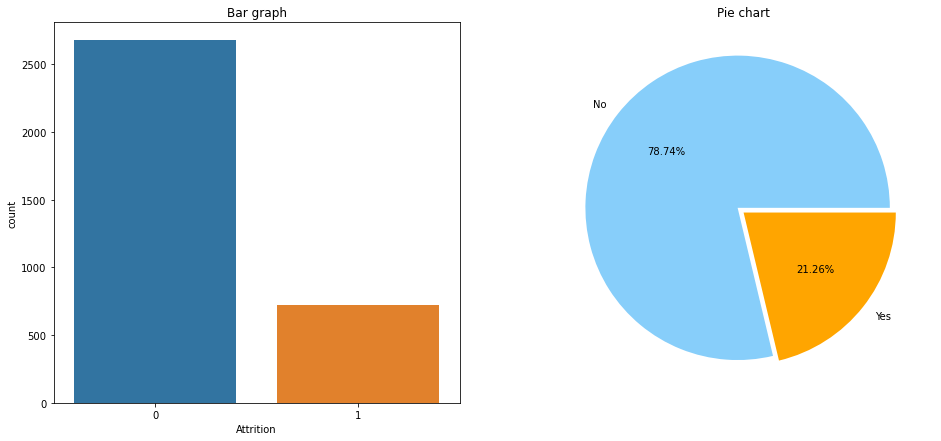

In [50]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
sns.countplot(df['Attrition'])
plt.title('Bar graph')

plt.subplot(1,2,2)
plt.pie(df['Attrition'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['No', 'Yes'], autopct='%.2f%%')
plt.title('Pie chart')

plt.show()

### STUDENT IDENTIFIERv

In [11]:
df['STUDENT IDENTIFIER'].nunique()

#There 3400 unique id's, unique id for each record.
#Insignificant variable, we can remove this feature

3400

### STDNT_AGE

In [66]:
df['STDNT_AGE'].describe()

#IQR method will be not possible because Q1, Q3, Q2 are same

count    3400.000000
mean       17.994118
std         0.552052
min        16.000000
25%        18.000000
50%        18.000000
75%        18.000000
max        26.000000
Name: STDNT_AGE, dtype: float64

C:\Users\thrarun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STDNT_AGE', ylabel='Density'>

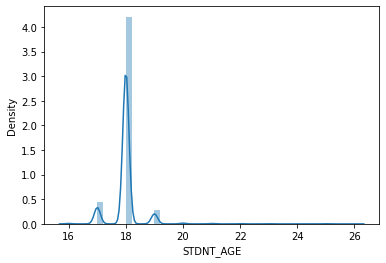

In [12]:
#distribution

sns.distplot(df['STDNT_AGE'])

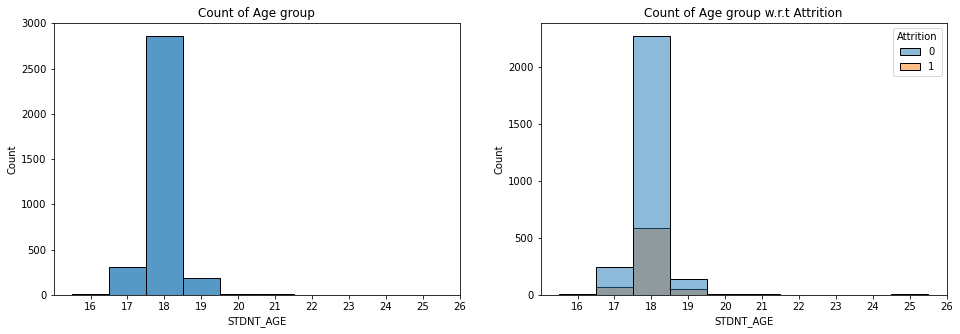

In [79]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['STDNT_AGE'], binwidth=1)
plt.xticks(ticks=np.arange(16.5,27.5,1) , labels=np.arange(16,27))
plt.title('Count of Age group')

plt.subplot(1,2,2)
sns.histplot(data=df, x='STDNT_AGE', hue='Attrition', binwidth=1)
plt.xticks(ticks=np.arange(16.5,27.5,1) , labels=np.arange(16,27))
plt.title('Count of Age group w.r.t Attrition')
plt.show()

<AxesSubplot:xlabel='STDNT_AGE'>

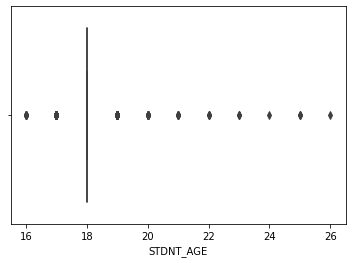

In [80]:
#outliers in AGE group

sns.boxplot(df['STDNT_AGE'])

In [83]:
df['STDNT_AGE'].value_counts()


18    2860
17     309
19     190
20      14
16       8
21       7
22       4
25       3
23       3
26       1
24       1
Name: STDNT_AGE, dtype: int64

### STDNT_GENDER

In [85]:
df['STDNT_GENDER'].value_counts()

#Female students are more

F    2140
M    1260
Name: STDNT_GENDER, dtype: int64

In [125]:
df['STDNT_GENDER'].value_counts(normalize=True) * 100

F    62.941176
M    37.058824
Name: STDNT_GENDER, dtype: float64

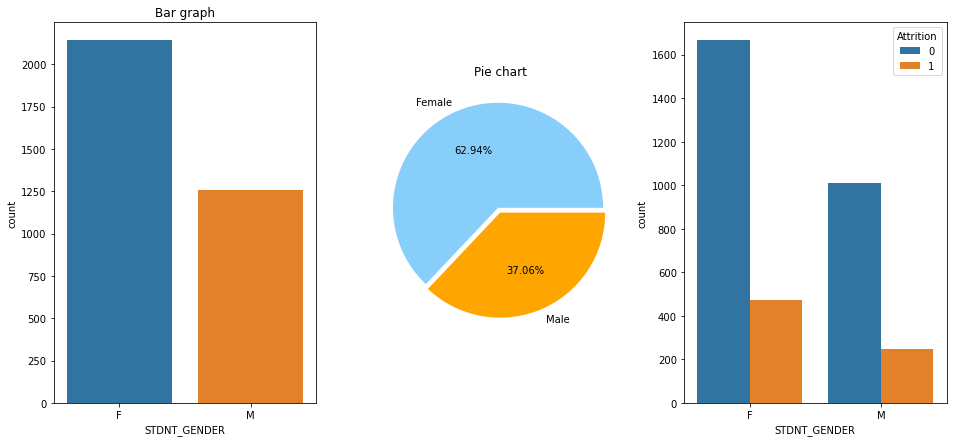

In [89]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
sns.countplot(df['STDNT_GENDER'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(df['STDNT_GENDER'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['Female', 'Male'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(df['STDNT_GENDER'], hue=df['Attrition'])

plt.show()

#Female tends to attrition compared to male

### STDNT_BACKGROUND

In [90]:
df['STDNT_BACKGROUND'].value_counts()

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

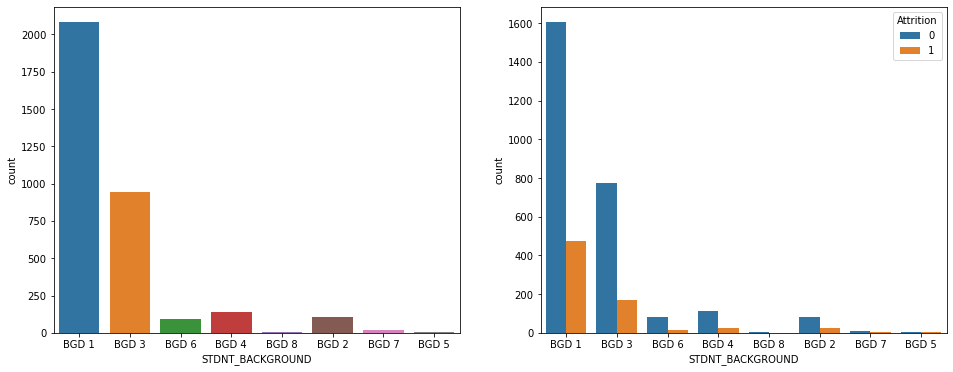

In [93]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(df['STDNT_BACKGROUND'])

plt.subplot(1,2,2)
sns.countplot(df['STDNT_BACKGROUND'], hue=df['Attrition'])
plt.show()

#more students are from BGD1 & more attrition is also from BGD1

In [101]:
pd.crosstab(index=df['STDNT_BACKGROUND'], columns=df['Attrition'])

Attrition,0,1
STDNT_BACKGROUND,,
BGD 1,1605,477
BGD 2,82,24
BGD 3,777,170
BGD 4,113,26
BGD 5,4,4
BGD 6,80,14
BGD 7,12,7
BGD 8,4,1


In [100]:
pd.crosstab(index=df['STDNT_BACKGROUND'], columns=df['Attrition'], normalize='index')

Attrition,0,1
STDNT_BACKGROUND,,
BGD 1,0.770893,0.229107
BGD 2,0.773585,0.226415
BGD 3,0.820486,0.179514
BGD 4,0.812950,0.187050
BGD 5,0.500000,0.500000
BGD 6,0.851064,0.148936
BGD 7,0.631579,0.368421
BGD 8,0.800000,0.200000


In [102]:
df_yes = df[df['Attrition'] == 1]
df_no = df[df['Attrition'] == 0]

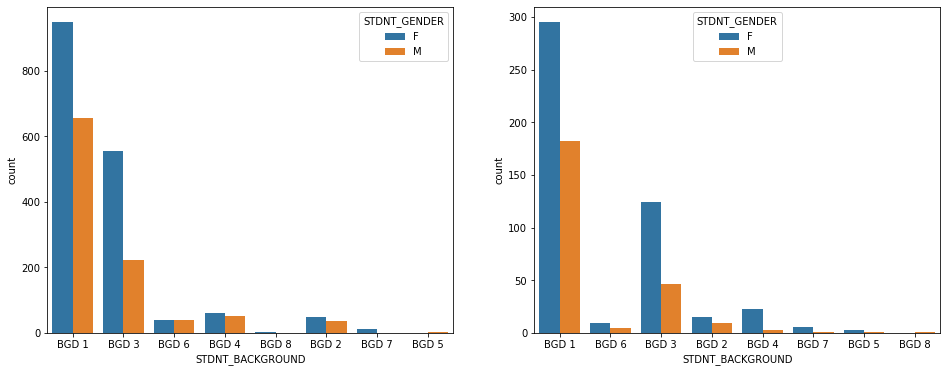

In [103]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
sns.countplot(df_no['STDNT_BACKGROUND'], hue=df_no['STDNT_GENDER'])

plt.subplot(1,2,2)
sns.countplot(df_yes['STDNT_BACKGROUND'], hue=df_yes['STDNT_GENDER'])
plt.show()

#Gender vs Bckground vs target

### IN_STATE_FLAG

In [104]:
df['IN_STATE_FLAG'].value_counts()

Y    3063
N     337
Name: IN_STATE_FLAG, dtype: int64

In [106]:
df['IN_STATE_FLAG'].value_counts(normalize=True) * 100

Y    90.088235
N     9.911765
Name: IN_STATE_FLAG, dtype: float64

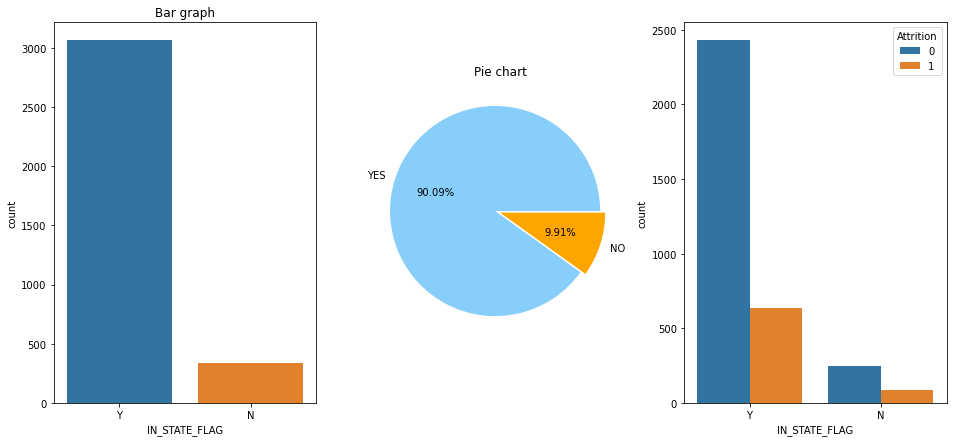

In [110]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
sns.countplot(df['IN_STATE_FLAG'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(df['IN_STATE_FLAG'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(df['IN_STATE_FLAG'], hue=df['Attrition'])

plt.show()

#many are from same state and many student have left the course

In [112]:
pd.crosstab(df['IN_STATE_FLAG'], df['Attrition'], normalize='index')

Attrition,0,1
IN_STATE_FLAG,,
N,0.735905,0.264095
Y,0.793013,0.206987


### INTERNATIONAL_STS

In [113]:
df['INTERNATIONAL_STS'].value_counts()

N    3373
Y      27
Name: INTERNATIONAL_STS, dtype: int64

In [115]:
df['INTERNATIONAL_STS'].value_counts(normalize=True) * 100

#we can ignore this feature, but we can analyse with target once

N    99.205882
Y     0.794118
Name: INTERNATIONAL_STS, dtype: float64

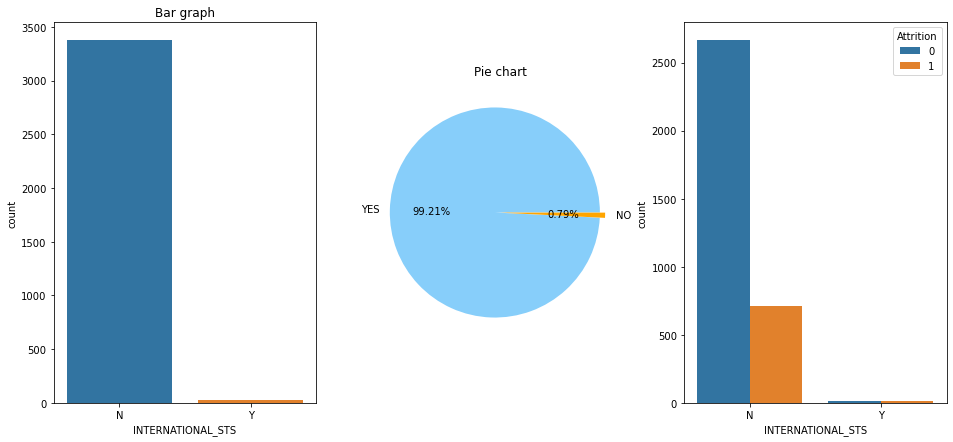

In [116]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
sns.countplot(df['INTERNATIONAL_STS'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(df['INTERNATIONAL_STS'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['YES', 'NO'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(df['INTERNATIONAL_STS'], hue=df['Attrition'])

plt.show()

#many are from same state and many student have left the course

In [117]:
pd.crosstab(df['INTERNATIONAL_STS'], df['Attrition'])

Attrition,0,1
INTERNATIONAL_STS,,
N,2662,711
Y,15,12


### STDNT_MAJOR

In [118]:
df['STDNT_MAJOR'].isnull().sum()

0

In [126]:
df['STDNT_MAJOR'].value_counts()

#Many of the students have not declared there majir subject, 

Undeclared                        460
Biology                           362
Early Childhood Education         190
Pre-Nursing                       177
Nursing                           164
Psychology                        155
Pre-Business                      133
Theatre Arts                      131
Music Performance                  99
Criminal Justice                   98
Music Education                    96
General Business                   85
Exercise Science                   81
Art                                75
Management                         72
Communication                      70
Political Science                  64
Chemistry                          64
English Language/Literature        60
Engineering Studies                60
Marketing                          59
Computer Science - Systems         58
Accounting                         54
Health Science                     48
Computer Science - Games           40
Joint Enrollment - Accel           35
History     

In [121]:
pd.crosstab(df['STDNT_MAJOR'], df['Attrition'])

Attrition,0,1
STDNT_MAJOR,,
Accounting,42,12
Applied Computer Science,27,5
Art,57,18
Art Education,7,2
Biology,280,82
Biology and Secondary Ed,2,3
Chemistry,54,10
Chemistry and Secondary Ed,2,0
Communication,56,14


### STDNT_MINOR

In [130]:
df['STDNT_MINOR'].value_counts(normalize=True) * 100

#93% students have no minor subject

N                                92.941176
Spanish                           0.764706
Psychology                        0.558824
Music                             0.558824
Foundations of Business           0.441176
Communication                     0.411765
History                           0.382353
Theatre Arts                      0.352941
Criminal Justice                  0.352941
Computer Science - Systems        0.294118
Early Childhood Education         0.264706
Mathematics                       0.205882
Marketing                         0.176471
Art History                       0.176471
Professional Writing              0.176471
Art                               0.147059
Sociology                         0.147059
English Language/Literature       0.147059
Accounting                        0.117647
Biology                           0.117647
Chemistry                         0.117647
French                            0.117647
Political Science                 0.117647
Health Scie

In [131]:
pd.crosstab(df['STDNT_MINOR'], df['Attrition'])

#we can remove this feature

Attrition,0,1
STDNT_MINOR,,
Accounting,3,1
African Studies,2,0
Anthropology,2,0
Art,3,2
Art History,4,2
Asian Studies,2,0
Biology,3,1
Chemistry,4,0
Communication,13,1


### ENtrance test

In [133]:
df[['STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2','STDNT_TEST_ENTRANCE_COMB']].isnull().sum()

#we can consider combined entrance marks

STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
dtype: int64

<AxesSubplot:xlabel='STDNT_TEST_ENTRANCE_COMB', ylabel='Density'>

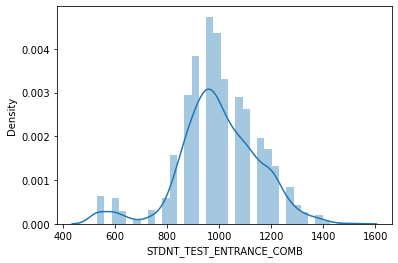

In [134]:
sns.distplot(df['STDNT_TEST_ENTRANCE_COMB'])

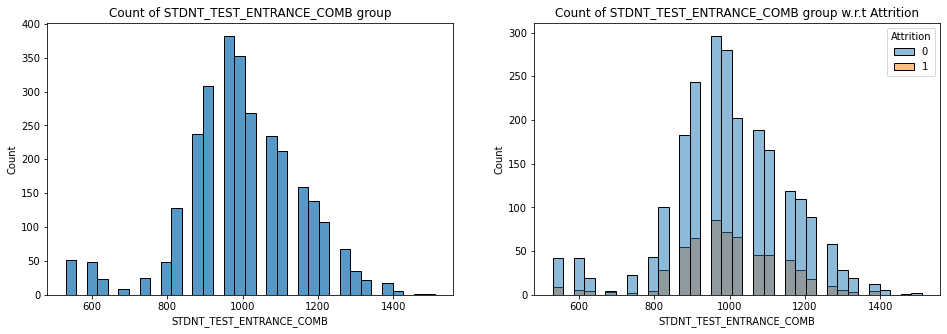

In [136]:
plt.figure(figsize=(16,5))

plt.subplot(1,2,1)
sns.histplot(df['STDNT_TEST_ENTRANCE_COMB'])
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group')

plt.subplot(1,2,2)
sns.histplot(data=df, x='STDNT_TEST_ENTRANCE_COMB', hue='Attrition')
plt.title('Count of STDNT_TEST_ENTRANCE_COMB group w.r.t Attrition')
plt.show()

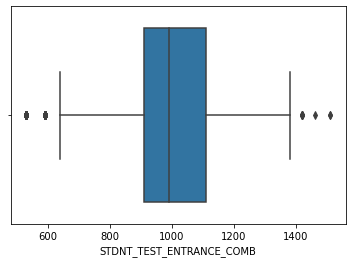

In [139]:
#For null values we can impute mean, data is normal

sns.boxplot(df['STDNT_TEST_ENTRANCE_COMB'])
plt.show()
#we can use IQR technique to remove outliers

### First term

In [142]:
df['FIRST_TERM'].min(), df['FIRST_TERM'].max()

#Data consists of 6years, 2005 to 2010
#we can convert it to year feature and then label encode it

(200508, 201008)

In [144]:
df[['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F']]

,CORE_COURSE_NAME_1_F,CORE_COURSE_NAME_2_F,CORE_COURSE_NAME_3_F,CORE_COURSE_NAME_4_F,CORE_COURSE_NAME_5_F,CORE_COURSE_NAME_6_F
0,ANTH 1105,ARTH 1100,ENGL 1102,PSYC 1101,NaN,NaN
1,ANTH 1105,GERM 1002,ITDS 2735,MATH 1125,THEA 1100,POLS 1101
2,ANTH 1105,ENGL 1101,HIST 2111,MATH 1111,SOCI 1101,NaN
3,ANTH 1107,COMM 1110,NaN,NaN,NaN,NaN
4,ANTH 1107,ARTH 1100,CPSC 1105,MATH 1111,NaN,NaN
...,...,...,...,...,...,...
3395,COMM 1110,NaN,NaN,NaN,NaN,NaN
3396,POLS 1101,NaN,NaN,NaN,NaN,NaN
3397,ENGL 1101,NaN,NaN,NaN,NaN,NaN
3398,PSYC 1101,NaN,NaN,NaN,NaN,NaN


In [151]:
pd.concat([df['CORE_COURSE_NAME_1_F'], df['CORE_COURSE_NAME_2_F'], df['CORE_COURSE_NAME_3_F'], df['CORE_COURSE_NAME_4_F'],
          df['CORE_COURSE_NAME_5_F'], df['CORE_COURSE_NAME_6_F']]).value_counts()
#instead of course name, we can consider the grades for each student with number of subjects

ENGL 1101                   2330
HIST 2111                    825
COMM 1110                    780
MATH 1111                    740
POLS 1101                    520
                            ... 
Life and Career Planning       1
U.S. History to 1865           1
LATN 1002                      1
BIOL 1225K                     1
FREN 2002                      1
Length: 83, dtype: int64

In [153]:
pd.concat([df['CORE_COURSE_GRADE_1_F'], df['CORE_COURSE_GRADE_2_F'], df['CORE_COURSE_GRADE_3_F'], df['CORE_COURSE_GRADE_4_F'],
          df['CORE_COURSE_GRADE_5_F'], df['CORE_COURSE_GRADE_6_F']]).value_counts()

B          4100
A          3905
C          2402
D           966
F           595
NOT REP     109
INCOMPL      35
dtype: int64

### Second term

In [156]:
df['SECOND_TERM'].min(), df['SECOND_TERM'].max()

#Data consists of 6years, 2005 to 2010. But second sem starts after 6months
#we can convert it to year feature and then label encode it

#instead of course name, we can consider the grades for each student with number of subjects

(200602, 201102)

### HOUSING_STS

In [157]:
df['HOUSING_STS'].value_counts()

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

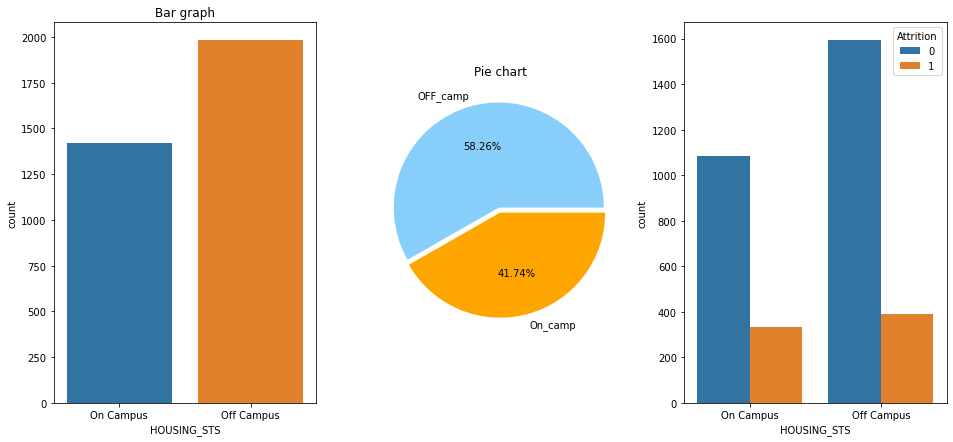

In [159]:
plt.figure(figsize=(16,7))

plt.subplot(1,3,1)
sns.countplot(df['HOUSING_STS'])
plt.title('Bar graph')

plt.subplot(1,3,2)
plt.pie(df['HOUSING_STS'].value_counts(),explode=[0.05,0], colors=[ 'lightskyblue', 'orange'], labels=['OFF_camp', 'On_camp'], autopct='%.2f%%')
plt.title('Pie chart')

plt.subplot(1,3,3)
sns.countplot(df['HOUSING_STS'], hue=df['Attrition'])

plt.show()


### DISTANCE_FROM_HOME

In [161]:
df['DISTANCE_FROM_HOME'].min(), df['DISTANCE_FROM_HOME'].max()

(0.0, 5932.0)

<AxesSubplot:xlabel='DISTANCE_FROM_HOME', ylabel='Density'>

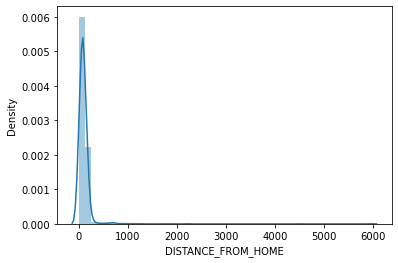

In [163]:
sns.distplot(df['DISTANCE_FROM_HOME'])

<AxesSubplot:xlabel='DISTANCE_FROM_HOME'>

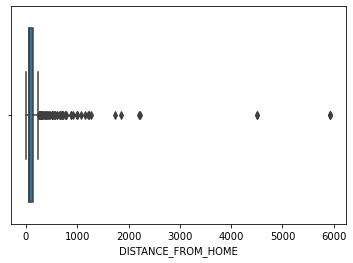

In [164]:
#There are outliers

sns.boxplot(df['DISTANCE_FROM_HOME'])

In [166]:
df['HIGH_SCHL_GPA'].isnull().sum()

53

In [167]:
df['HIGH_SCHL_NAME'].value_counts()

SCHOOL 11     249
SCHOOL 130    245
SCHOOL 10     238
SCHOOL 1      209
SCHOOL 2      129
             ... 
SCHOOL 433      1
SCHOOL 212      1
SCHOOL 134      1
SCHOOL 525      1
SCHOOL 391      1
Name: HIGH_SCHL_NAME, Length: 439, dtype: int64

In [168]:
df['FATHER_HI_EDU_CD'].value_counts()

#we can remove anyone of the columns FATHER_HI_EDU_CD, FATHER_HI_EDU_DESC
#same with mothers education

2.0    1336
3.0    1309
4.0     226
1.0      97
Name: FATHER_HI_EDU_CD, dtype: int64

In [169]:
df['DEGREE_GROUP_CD'].value_counts()

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64

In [171]:
df['DEGREE_GROUP_DESC'].value_counts()

#we can remove one columns ==> DEGREE_GROUP_CD or DEGREE_GROUP_DESC and encode the other columns

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

In [173]:
(df['FIRST_TERM_ATTEMPT_HRS'] - df['FIRST_TERM_EARNED_HRS']).min()

-3

# Data pre-processing

In [178]:
#remove 'STUDENT IDENTIFIER' column, it is redundant

df.drop('STUDENT IDENTIFIER', axis=1, inplace=True)

In [180]:
df.isnull().sum()

STDNT_AGE                      0
STDNT_GENDER                   0
STDNT_BACKGROUND               0
IN_STATE_FLAG                  0
INTERNATIONAL_STS              0
STDNT_MAJOR                    0
STDNT_MINOR                    0
STDNT_TEST_ENTRANCE1        2294
STDNT_TEST_ENTRANCE2         908
STDNT_TEST_ENTRANCE_COMB     518
FIRST_TERM                     0
CORE_COURSE_NAME_1_F           0
CORE_COURSE_GRADE_1_F          0
CORE_COURSE_NAME_2_F          99
CORE_COURSE_GRADE_2_F         99
CORE_COURSE_NAME_3_F         565
CORE_COURSE_GRADE_3_F        565
CORE_COURSE_NAME_4_F        1597
CORE_COURSE_GRADE_4_F       1597
CORE_COURSE_NAME_5_F        2755
CORE_COURSE_GRADE_5_F       2755
CORE_COURSE_NAME_6_F        3272
CORE_COURSE_GRADE_6_F       3272
SECOND_TERM                    0
CORE_COURSE_NAME_1_S         157
CORE_COURSE_GRADE_1_S        232
CORE_COURSE_NAME_2_S         439
CORE_COURSE_GRADE_2_S        439
CORE_COURSE_NAME_3_S        1038
CORE_COURSE_GRADE_3_S       1038
CORE_COURS

In [188]:
df['STDNT_MAJOR'].unique(), df['STDNT_MAJOR'].nunique()

#There are no null values but there are undeclared category, we can perform a statistical test & decide whether to remove 
#or not

(array(['Undeclared', 'Mathematics', 'Art', 'Political Science', 'Biology',
        'Accounting', 'Criminal Justice', 'Psychology', 'Theatre Arts',
        'Nursing', 'Pre-Nursing', 'Chemistry', 'Pre-Engineering/RETP',
        'Early Childhood Education', 'Music Performance',
        'English Language/Literature', 'Joint Enrollment - Accel',
        'History and Secondary Ed', 'History', 'Engineering Studies',
        'Computer Science - Systems', 'Pre-Business', 'Management',
        'Theatre Education', 'Marketing', 'Communication',
        'Music Education', 'French with Teacher Cert',
        'English and Secondary Ed', 'Exercise Science', 'General Business',
        'Mathematics and Secondary Ed', 'Finance', 'French',
        'Health Science', 'Spec Ed: Gen. Curr. - Reading', 'Music',
        'Middle Grades Education', 'Geology',
        'Management Information Systems', 'Art Education',
        'Applied Computer Science', 'Information Technology', 'Sociology',
        'Computer S

In [195]:
#if we encode it 54 cat will be formed.

#we can perform a statiscal test to find out whether there is a relationship b/w target and major subject

#Chi2 contingency
# Ho : There is no relation
# Ha : There is a relation

obs = pd.crosstab(df['Attrition'], df['STDNT_MAJOR'])

tstat, pvalue, x, exp = stats.chi2_contingency(obs)

print(pvalue)

# pval = 0.0022
# pval < sig lvl
# Ho is rejected
# There is a relation

#we dont remove that feature, instead we can label encode it

0.002281570927520071


In [197]:
#we can perform a statiscal test to find out whether there is a relationship b/w target and minor subject

#Chi2 contingency
# Ho : There is no relation
# Ha : There is a relation

obs = pd.crosstab(df['Attrition'], df['STDNT_MINOR'])

tstat, pvalue, x, exp = stats.chi2_contingency(obs)

print(pvalue)
#there is no relationship, we drop that column

df.drop('STDNT_MINOR', axis=1, inplace=True)

0.5562124183770998


In [199]:
#Entrance exam, we can consider only STDNT_TEST_ENTRANCE_COMB, we can drop other 2 columns

df.drop(['STDNT_TEST_ENTRANCE1', 'STDNT_TEST_ENTRANCE2'], axis=1, inplace=True)

In [205]:
print('no of null values', df['STDNT_TEST_ENTRANCE_COMB'].isnull().sum())
#there are 518 null values, 

df['STDNT_TEST_ENTRANCE_COMB'].skew()
#its lightly left skewed, we can impute null with mean value/

no of null values 518


-0.36469197420163796

In [208]:
a = df['STDNT_TEST_ENTRANCE_COMB'].mean()

df['STDNT_TEST_ENTRANCE_COMB'] = df['STDNT_TEST_ENTRANCE_COMB'].fillna(a)

In [214]:
#First term
#we can check the difference between 1 & 2term. If all the students have 6months as first term. We can keep only one value
#That is year of first term

(df['SECOND_TERM'] - df['FIRST_TERM']).unique()
#Every student stuides 6months per term

array([94], dtype=int64)

In [215]:
#we can remove Second term feature
df.drop('SECOND_TERM', axis=1, inplace=True)

In [223]:
#we can keep only year as first term and then later we can label encode it

df['FIRST_TERM'] = df['FIRST_TERM'].apply(lambda x: str(x)[:4])

#table has 5years of data

In [271]:
#We can remove all the subject names and keep number of subjects each student attended

#we can change the feature as 1 if there is a subject else 0

#list of course feature name taken by each student in first term
course_1 = ['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F']

for feat in course_1:
    df[feat] = df_copy[feat].fillna(0).apply(lambda x: 0 if x==0 else 1)

In [276]:
df['No_sub_first_term'] = df[['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F']].sum(axis=1)

In [338]:
#remove those course columns

df.drop(['CORE_COURSE_NAME_1_F',  'CORE_COURSE_NAME_2_F', 'CORE_COURSE_NAME_3_F', 'CORE_COURSE_NAME_4_F',
      'CORE_COURSE_NAME_5_F', 'CORE_COURSE_NAME_6_F'], axis=1, inplace=True)

In [ ]:
#Calculate the grades obtained by each student in overall subjects
#Almost every students have cleared the course, we can delete these grades

df.drop(['CORE_COURSE_GRADE_1_F',  'CORE_COURSE_GRADE_2_F', 'CORE_COURSE_GRADE_3_F', 'CORE_COURSE_GRADE_4_F',
      'CORE_COURSE_GRADE_5_F', 'CORE_COURSE_GRADE_6_F'], axis=1, inplace=True)

In [328]:
#WE can calculate no of sunjects taken in 2nd term and delete those columns

#list of course feature name taken by each student in first term
course_2 = ['CORE_COURSE_NAME_1_S',  'CORE_COURSE_NAME_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_NAME_4_S',
      'CORE_COURSE_NAME_5_S', 'CORE_COURSE_NAME_6_S']

for feat in course_2:
    df[feat] = df_copy[feat].fillna(0).apply(lambda x: 0 if x==0 else 1)

In [329]:
df['No_sub_second_term'] = df[['CORE_COURSE_NAME_1_S',  'CORE_COURSE_NAME_2_S', 'CORE_COURSE_NAME_3_S', 'CORE_COURSE_NAME_4_S',
      'CORE_COURSE_NAME_5_S', 'CORE_COURSE_NAME_6_S']].sum(axis=1)

In [333]:
#remove those course columns

df.drop(course_2, axis=1, inplace=True)

In [334]:
#remove grade columns

df.drop(['CORE_COURSE_GRADE_1_S',  'CORE_COURSE_GRADE_2_S', 'CORE_COURSE_GRADE_3_S', 'CORE_COURSE_GRADE_4_S',
      'CORE_COURSE_GRADE_5_S', 'CORE_COURSE_GRADE_6_S'], axis=1, inplace=True)

In [362]:
df['HOUSING_STS'].value_counts()

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

In [449]:
df['DISTANCE_FROM_HOME'].isnull().sum()
#there are 25null values, we can impute the null values

#we can fill mean for null values

25

In [451]:
df['DISTANCE_FROM_HOME'].fillna(df['DISTANCE_FROM_HOME'].mean(), inplace=True)

In [456]:
#we can impute null with mean
df['HIGH_SCHL_GPA'].fillna(df['HIGH_SCHL_GPA'].mean(), inplace=True)

In [472]:
#1 null value in HIGH_school_name
#we can back fill this record

df['HIGH_SCHL_NAME'].fillna(method='bfill', inplace=True)

In [474]:
#we could drop FATHER_HI_EDU_CD & MOTHER_HI_EDU_CD, becuase it duplicated with FATHER_HI_EDU_DESC & moTHER_HI_EDU_DESC

df.drop(['FATHER_HI_EDU_CD', 'MOTHER_HI_EDU_CD'], axis=1, inplace=True)

In [481]:
# DEGREE_GROUP_CD  and  DEGREE_GROUP_DESC are same, we can drop anyone

df.drop('DEGREE_GROUP_CD', axis=1, inplace=True)

In [485]:
df['First_term_backlog_hrs']  = (df['FIRST_TERM_ATTEMPT_HRS'] - df['FIRST_TERM_EARNED_HRS'])

In [486]:
df.drop('FIRST_TERM_EARNED_HRS', axis=1, inplace=True)

In [491]:
df['First_term_backlog_hrs'] = df['First_term_backlog_hrs'].apply(lambda x : 0 if x<0 else x)

In [498]:
# SECOND_TERM_ATTEMPT_HRS & SECOND_TERM_EARNED_HRS have null, might be they left the course after first term,
#we impute with 0

df['SECOND_TERM_ATTEMPT_HRS'].fillna(0, inplace=True)
df['SECOND_TERM_EARNED_HRS'].fillna(0, inplace=True)

In [501]:
df['Second_term_backlog_hrs']  = (df['SECOND_TERM_ATTEMPT_HRS'] - df['SECOND_TERM_EARNED_HRS'])
df['Second_term_backlog_hrs'] = df['Second_term_backlog_hrs'].apply(lambda x : 0 if x<0 else x)

In [502]:
df.drop('SECOND_TERM_EARNED_HRS', axis=1, inplace=True)

In [506]:
#we can drop GROSS_FIN_NEED, becuase we have one more column called unmet need

df.drop('GROSS_FIN_NEED',axis=1, inplace=True)

In [510]:
df['UNMET_NEED'] = df['UNMET_NEED'].apply(lambda x: 0 if x<0 else x)

In [517]:
df.isnull().sum().sum()

#there is no null value

0

In [514]:
df.shape

(3400, 25)

In [516]:
#duplicate records

df.duplicated().value_counts()

False    3400
dtype: int64

### Outlier treatment

In [519]:
df.select_dtypes(include='number').columns

Index(['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'DISTANCE_FROM_HOME',
       'HIGH_SCHL_GPA', 'FIRST_TERM_ATTEMPT_HRS', 'SECOND_TERM_ATTEMPT_HRS',
       'COST_OF_ATTEND', 'EST_FAM_CONTRIBUTION', 'UNMET_NEED', 'Attrition',
       'No_sub_first_term', 'No_sub_second_term', 'First_term_backlog_hrs',
       'Second_term_backlog_hrs'],
      dtype='object')

In [524]:
df = df[df['HIGH_SCHL_GPA'] != 0]

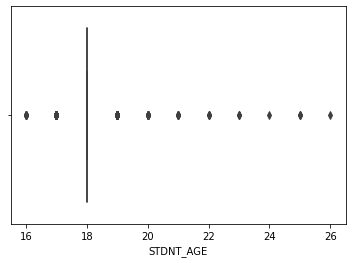

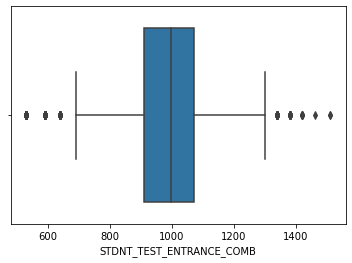

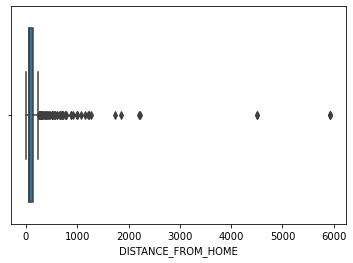

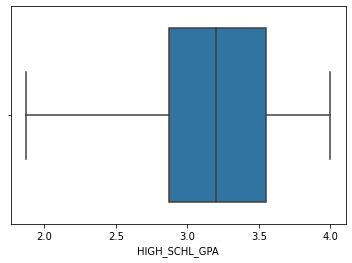

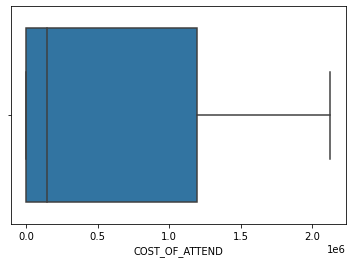

In [525]:
num_list = ['STDNT_AGE', 'STDNT_TEST_ENTRANCE_COMB', 'DISTANCE_FROM_HOME', 'HIGH_SCHL_GPA', 'COST_OF_ATTEND']

for feat in num_list:
    sns.boxplot(df[feat])
    plt.show()

In [526]:
#Power transformation to reduce outliers

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [530]:
df[num_list] = pt.fit_transform(df[num_list])

### Label encoding

In [553]:
df.drop('HIGH_SCHL_NAME', axis=1, inplace=True)

In [554]:
cat_list = list(df.select_dtypes(exclude='number').columns)

In [555]:
cat_list

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'FIRST_TERM',
 'HOUSING_STS',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_DESC']

In [557]:
df_final = pd.get_dummies(df, columns=cat_list, drop_first=True)

In [559]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3399
Data columns (total 93 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   STDNT_AGE                                     3399 non-null   float64
 1   STDNT_TEST_ENTRANCE_COMB                      3399 non-null   float64
 2   DISTANCE_FROM_HOME                            3399 non-null   float64
 3   HIGH_SCHL_GPA                                 3399 non-null   float64
 4   FIRST_TERM_ATTEMPT_HRS                        3399 non-null   int64  
 5   SECOND_TERM_ATTEMPT_HRS                       3399 non-null   float64
 6   COST_OF_ATTEND                                3399 non-null   float64
 7   EST_FAM_CONTRIBUTION                          3399 non-null   int64  
 8   UNMET_NEED                                    3399 non-null   float64
 9   Attrition                                     3399 non-null   i

In [563]:
# split

y = df_final['Attrition']
X = df_final.drop('Attrition', axis=1)

In [564]:
#test, train
from sklearn.model_selection import train_test_split

In [565]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [567]:
#Data transform for Unmet need, EST_FAM_CONTRIBUTION

X_train['EST_FAM_CONTRIBUTION'] = pt.fit_transform(X_train[['EST_FAM_CONTRIBUTION']])
X_test['EST_FAM_CONTRIBUTION'] = pt.transform(X_test[['EST_FAM_CONTRIBUTION']])

In [568]:
X_train['UNMET_NEED'] = pt.fit_transform(X_train[['UNMET_NEED']])
X_test['UNMET_NEED'] = pt.transform(X_test[['UNMET_NEED']])

# Model building

In [707]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

In [777]:
def model_eval(algo, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    algo.fit(X_train, y_train)
    
    y_train_pred = algo.predict(X_train)
    y_train_pred_proba = algo.predict_proba(X_train)[:, 1]

    cm = confusion_matrix(y_train, y_train_pred)
    print('Train dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_train, y_train_pred))
    print('Precision :',precision_score(y_train, y_train_pred))
    print('Recall :', recall_score(y_train, y_train_pred))
    print('AUC score :', roc_auc_score(y_train, y_train_pred_proba))
    print('F1 score :', f1_score(y_train, y_train_pred))
    
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, y_train_pred_proba)

    plt.plot(fpr_train,fpr_train)
    plt.plot(fpr_train,tpr_train)
    plt.show()
    
    
    y_test_pred = algo.predict(X_test)
    y_test_pred_proba = algo.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_test_pred)
    print('\n\nTest dataset :\n')
    print('Confusion matrix:\n', cm)
    print('Accuracy :', accuracy_score(y_test, y_test_pred))
    print('Precision :',precision_score(y_test, y_test_pred))
    print('Recall :', recall_score(y_test, y_test_pred))
    print('AUC score :', roc_auc_score(y_test, y_test_pred_proba))
    print('F1 score :', f1_score(y_test, y_test_pred))
    
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, y_test_pred_proba)

    plt.plot(fpr_test,fpr_test)
    plt.plot(fpr_test,tpr_test)
    plt.show()

## 1.Logistic regression

In [778]:
from sklearn.linear_model import LogisticRegression

Train dataset :

Confusion matrix:
 [[1851   30]
 [ 351  147]]
Accuracy : 0.8398486759142497
Precision : 0.8305084745762712
Recall : 0.29518072289156627
AUC score : 0.7563993347125877
F1 score : 0.43555555555555553


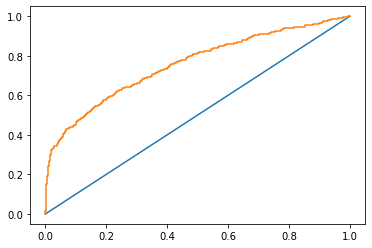



Test dataset :

Confusion matrix:
 [[788   8]
 [155  69]]
Accuracy : 0.8401960784313726
Precision : 0.8961038961038961
Recall : 0.3080357142857143
AUC score : 0.7104103104809764
F1 score : 0.45847176079734214


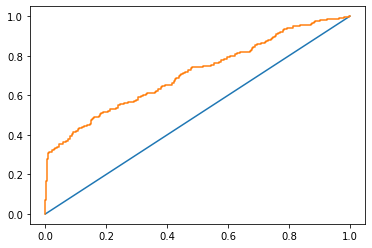

In [779]:
lor = LogisticRegression()

model_eval(lor)

## 1.1 Logistic regression with data imbalance treatment

In [780]:
y.value_counts(normalize=True) * 100

0    78.758458
1    21.241542
Name: Attrition, dtype: float64

In [781]:
from imblearn.over_sampling import SMOTE

In [782]:
sm = SMOTE(random_state=42)

In [783]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [784]:
y_train_sm.value_counts()

1    1881
0    1881
Name: Attrition, dtype: int64

In [785]:
y_train.value_counts()

0    1881
1     498
Name: Attrition, dtype: int64

In [786]:
X_train_sm.duplicated().value_counts()

False    3762
dtype: int64

Train dataset :

Confusion matrix:
 [[1666  215]
 [ 345 1536]]
Accuracy : 0.8511430090377459
Precision : 0.8772130211307824
Recall : 0.8165869218500797
AUC score : 0.9122264362757941
F1 score : 0.8458149779735682


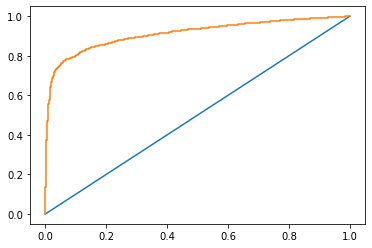



Test dataset :

Confusion matrix:
 [[690 106]
 [135  89]]
Accuracy : 0.7637254901960784
Precision : 0.4564102564102564
Recall : 0.39732142857142855
AUC score : 0.6804165918880116
F1 score : 0.42482100238663484


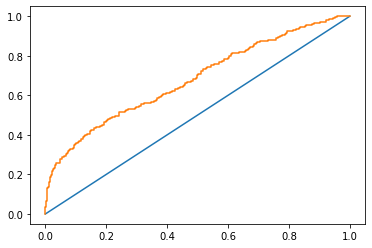

In [787]:
lor = LogisticRegression()

model_eval(lor, X_train_sm, X_test, y_train_sm, y_test)

## 1.3 Feature selection, LOG reg

In [788]:
#X['UNMET_NEED'] = df_final['UNMET_NEED']
#X['EST_FAM_CONTRIBUTION'] = df_final['EST_FAM_CONTRIBUTION']

In [789]:
X['UNMET_NEED'] = pt.fit_transform(X[['UNMET_NEED']])
X['EST_FAM_CONTRIBUTION'] = pt.fit_transform(X[['EST_FAM_CONTRIBUTION']])

In [790]:
from sklearn.feature_selection import RFECV

In [791]:
lor = LogisticRegression()

feat_sel = RFECV(lor, cv=3, scoring='roc_auc', n_jobs=-1)
feat_sel.fit(X,y)

RFECV(cv=3, estimator=LogisticRegression(), n_jobs=-1, scoring='roc_auc')

In [792]:
feat_sel.n_features_

76

In [793]:
rfe_df = pd.DataFrame(feat_sel.ranking_, index=X.columns, columns=['rank'])

In [794]:
selected = list(rfe_df[rfe_df['rank'] == 1].index)

In [795]:
X_train_sel = X_train[selected]
X_test_sel = X_test[selected]

Train dataset :

Confusion matrix:
 [[1852   29]
 [ 354  144]]
Accuracy : 0.8390079865489701
Precision : 0.8323699421965318
Recall : 0.2891566265060241
AUC score : 0.7516333275686478
F1 score : 0.4292101341281669


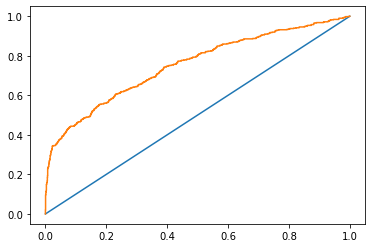



Test dataset :

Confusion matrix:
 [[789   7]
 [155  69]]
Accuracy : 0.8411764705882353
Precision : 0.9078947368421053
Recall : 0.3080357142857143
AUC score : 0.7194959170854272
F1 score : 0.46


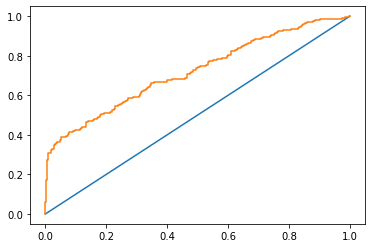

In [796]:
lor = LogisticRegression()

model_eval(lor, X_train_sel, X_test_sel, y_train, y_test)

In [797]:
X_train_sm_sel = X_train_sm[selected]
X_test_sm_sel = X_test[selected]

Train dataset :

Confusion matrix:
 [[1606  275]
 [ 357 1524]]
Accuracy : 0.8320042530568846
Precision : 0.8471372984991662
Recall : 0.810207336523126
AUC score : 0.8973534556511136
F1 score : 0.8282608695652174


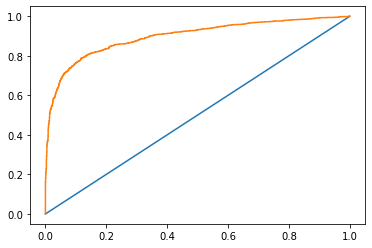



Test dataset :

Confusion matrix:
 [[675 121]
 [136  88]]
Accuracy : 0.7480392156862745
Precision : 0.42105263157894735
Recall : 0.39285714285714285
AUC score : 0.6813531945441493
F1 score : 0.40646651270207856


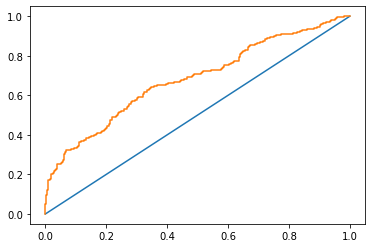

In [798]:
model_eval(lor, X_train_sm_sel, X_test_sm_sel, y_train_sm, y_test)

In [799]:
#SMOTE analysis

## 2. Decision Tree Classifier

In [800]:
from sklearn.tree import DecisionTreeClassifier

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0  498]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


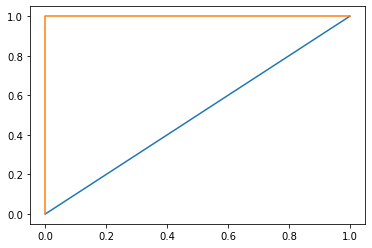



Test dataset :

Confusion matrix:
 [[666 130]
 [139  85]]
Accuracy : 0.7362745098039216
Precision : 0.3953488372093023
Recall : 0.3794642857142857
AUC score : 0.6080738513998564
F1 score : 0.38724373576309795


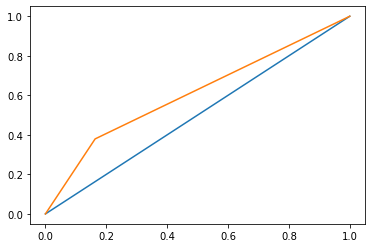

In [801]:
dtc = DecisionTreeClassifier(random_state=42)

model_eval(dtc)

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0 1881]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


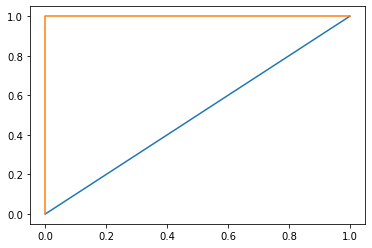



Test dataset :

Confusion matrix:
 [[624 172]
 [124 100]]
Accuracy : 0.7098039215686275
Precision : 0.36764705882352944
Recall : 0.44642857142857145
AUC score : 0.6151740847092606
F1 score : 0.403225806451613


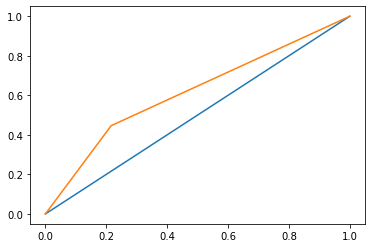

In [802]:
model_eval(dtc, X_train_sm, X_test, y_train_sm, y_test)

In [803]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [804]:
# hyperparameter tuning

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [5,6,7,8,9,10,11,12,13,14,15],
    'min_samples_split' : np.arange(2,15)
}

In [805]:
dtc = DecisionTreeClassifier()

g_search = GridSearchCV(dtc, param_grid=params, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3)
g_search.fit(X,y)

Fitting 3 folds for each of 286 candidates, totalling 858 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='roc_auc', verbose=3)

In [806]:
g_search.best_params_

{'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 13}

In [807]:
pd.DataFrame(g_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.048368,0.008265,0.012676,0.000943,gini,5,2,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.468818,0.440673,0.077806,257
1,0.056706,0.005441,0.020349,0.013209,gini,5,3,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469872,0.441025,0.077935,251
2,0.047034,0.003268,0.013009,0.002161,gini,5,4,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469760,0.440987,0.077921,253
3,0.050036,0.006687,0.022015,0.008988,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.468846,0.440682,0.077809,256
4,0.043365,0.001248,0.013677,0.002359,gini,5,6,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.468818,0.440673,0.077806,257


Train dataset :

Confusion matrix:
 [[1861   20]
 [ 292  206]]
Accuracy : 0.8688524590163934
Precision : 0.911504424778761
Recall : 0.41365461847389556
AUC score : 0.79438861239749
F1 score : 0.569060773480663


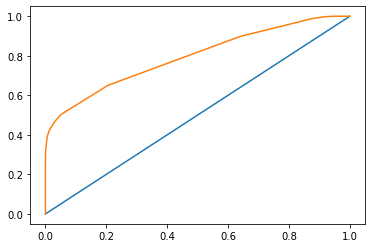



Test dataset :

Confusion matrix:
 [[764  32]
 [169  55]]
Accuracy : 0.8029411764705883
Precision : 0.632183908045977
Recall : 0.24553571428571427
AUC score : 0.6112958767049532
F1 score : 0.35369774919614144


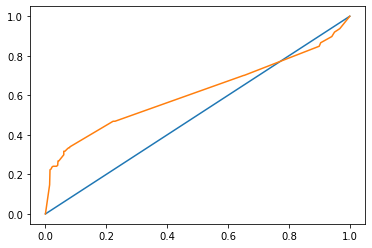

In [808]:
dtc = DecisionTreeClassifier(**g_search.best_params_, random_state=42)

model_eval(dtc)

Train dataset :

Confusion matrix:
 [[1677  204]
 [ 230 1651]]
Accuracy : 0.8846358320042531
Precision : 0.8900269541778976
Recall : 0.8777246145667198
AUC score : 0.9538231866780511
F1 score : 0.8838329764453962


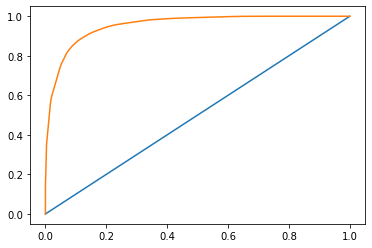



Test dataset :

Confusion matrix:
 [[645 151]
 [132  92]]
Accuracy : 0.7225490196078431
Precision : 0.3786008230452675
Recall : 0.4107142857142857
AUC score : 0.638513437724336
F1 score : 0.39400428265524623


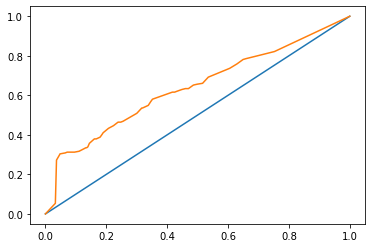

In [809]:
model_eval(dtc, X_train_sm, X_test, y_train_sm, y_test)

In [810]:
#RandomizedSearchCV

from scipy.stats import randint as sp_randint

In [811]:
params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : sp_randint(2,10),
    'min_samples_split' : sp_randint(2,12)
}

In [812]:
dtc= DecisionTreeClassifier()
r_search = RandomizedSearchCV(dtc, param_distributions=params, n_iter=100, scoring='roc_auc', n_jobs=-1, cv=3, verbose=3, random_state=42)
r_search.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000EB1B4E4190>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000EB18F498E0>},
                   random_state=42, scoring='roc_auc', verbose=3)

In [813]:
r_search.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 9}

In [814]:
pd.DataFrame(r_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044364,0.003095,0.010676,0.000472,gini,5,9,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469788,0.440997,0.077924,55
1,0.061043,0.003745,0.012008,0.001415,gini,6,8,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.490073,0.357312,0.493293,0.446893,0.063357,49
2,0.051703,0.006948,0.014010,0.002161,entropy,4,8,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.490178,0.337602,0.351264,0.393015,0.068931,96
3,0.046699,0.011332,0.017679,0.004717,gini,4,9,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.519009,0.335769,0.429027,0.427935,0.074811,64
4,0.044364,0.002870,0.012343,0.001247,gini,5,9,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.518723,0.334478,0.469760,0.440987,0.077921,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.043697,0.009470,0.017347,0.005739,gini,4,5,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.519009,0.335769,0.429027,0.427935,0.074811,64
96,0.072384,0.006654,0.010341,0.000471,entropy,8,5,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.553191,0.425497,0.551638,0.510109,0.059833,25
97,0.035358,0.002497,0.012676,0.001701,gini,2,9,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.503275,0.501770,0.426584,0.477210,0.035803,35
98,0.065381,0.010282,0.012675,0.004500,entropy,8,3,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",0.548048,0.417775,0.559031,0.508285,0.064157,27


Train dataset :

Confusion matrix:
 [[1852   29]
 [ 306  192]]
Accuracy : 0.8591845313156788
Precision : 0.8687782805429864
Recall : 0.3855421686746988
AUC score : 0.7886372710405685
F1 score : 0.5340751043115439


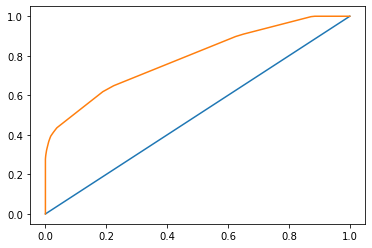



Test dataset :

Confusion matrix:
 [[772  24]
 [162  62]]
Accuracy : 0.8176470588235294
Precision : 0.7209302325581395
Recall : 0.2767857142857143
AUC score : 0.6348399362885856
F1 score : 0.4


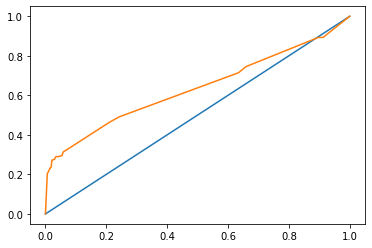

In [815]:
dtc = DecisionTreeClassifier(**r_search.best_params_, random_state=42)

model_eval(dtc)

Train dataset :

Confusion matrix:
 [[1480  401]
 [ 251 1630]]
Accuracy : 0.8266879319510898
Precision : 0.8025603151157066
Recall : 0.8665603402445508
AUC score : 0.9182997890712152
F1 score : 0.8333333333333333


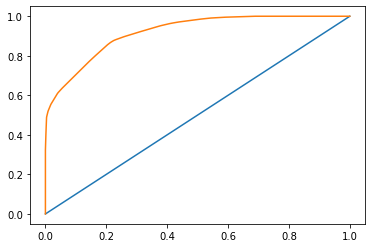



Test dataset :

Confusion matrix:
 [[587 209]
 [110 114]]
Accuracy : 0.6872549019607843
Precision : 0.35294117647058826
Recall : 0.5089285714285714
AUC score : 0.667601399856425
F1 score : 0.41681901279707495


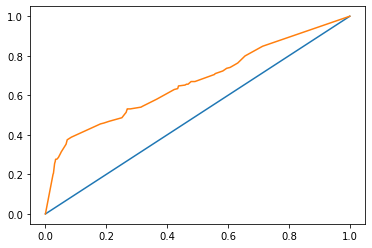

In [816]:
model_eval(dtc, X_train_sm, X_test, y_train_sm, y_test)

## 3. Random forest


In [817]:
from sklearn.ensemble import RandomForestClassifier

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0  498]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


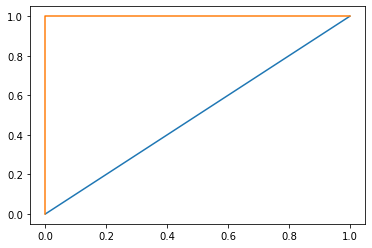



Test dataset :

Confusion matrix:
 [[789   7]
 [161  63]]
Accuracy : 0.8352941176470589
Precision : 0.9
Recall : 0.28125
AUC score : 0.6967426417803303
F1 score : 0.4285714285714286


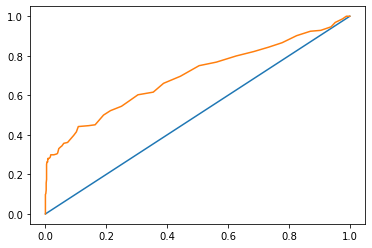

In [818]:
rfc = RandomForestClassifier(random_state=42)

model_eval(rfc)

Train dataset :

Confusion matrix:
 [[1881    0]
 [   0 1881]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
AUC score : 1.0
F1 score : 1.0


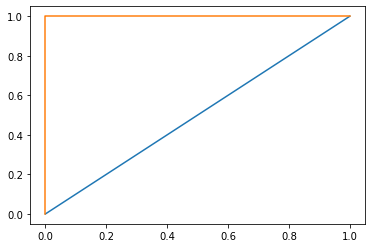



Test dataset :

Confusion matrix:
 [[757  39]
 [155  69]]
Accuracy : 0.8098039215686275
Precision : 0.6388888888888888
Recall : 0.3080357142857143
AUC score : 0.6998356739052405
F1 score : 0.41566265060240964


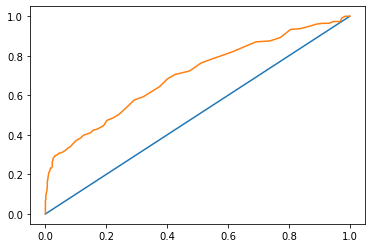

In [819]:
model_eval(rfc, X_train_sm, X_test, y_train_sm, y_test)

In [820]:
#hyparameter tuning

params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : sp_randint(2,20),
    'min_samples_split' : sp_randint(2,25),
    'n_estimators' : sp_randint(100,200)
}

rfc = RandomForestClassifier()

In [821]:
r_search = RandomizedSearchCV(rfc, param_distributions=params, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=3, random_state=42)
r_search.fit(X,y)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000EB182BF880>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000EB1C0CDF70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000EB16B64430>},
                   random_state=42, scoring='roc_auc')

In [822]:
r_search.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'min_samples_split': 10,
 'n_estimators': 102}

Train dataset :

Confusion matrix:
 [[1865   16]
 [ 351  147]]
Accuracy : 0.8457335014712064
Precision : 0.901840490797546
Recall : 0.29518072289156627
AUC score : 0.9687169731557811
F1 score : 0.44478063540090773


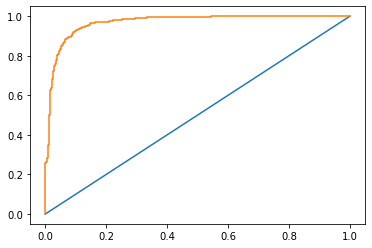



Test dataset :

Confusion matrix:
 [[790   6]
 [163  61]]
Accuracy : 0.8343137254901961
Precision : 0.9104477611940298
Recall : 0.27232142857142855
AUC score : 0.7101411073223259
F1 score : 0.4192439862542955


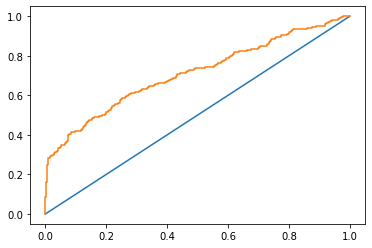

In [823]:
rfc = RandomForestClassifier(**r_search.best_params_, random_state=42)
model_eval(rfc)

Train dataset :

Confusion matrix:
 [[1822   59]
 [ 157 1724]]
Accuracy : 0.9425837320574163
Precision : 0.9669097027481772
Recall : 0.9165337586390218
AUC score : 0.9917411898441025
F1 score : 0.9410480349344978


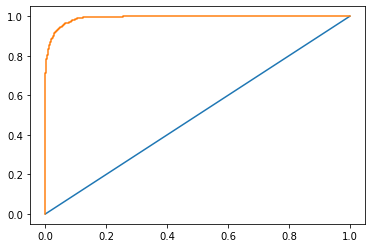



Test dataset :

Confusion matrix:
 [[747  49]
 [147  77]]
Accuracy : 0.807843137254902
Precision : 0.6111111111111112
Recall : 0.34375
AUC score : 0.6918240757358219
F1 score : 0.44000000000000006


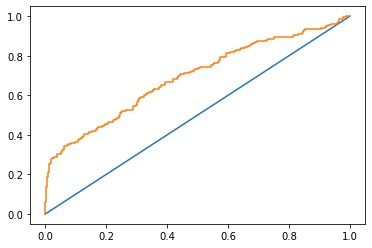

In [824]:
model_eval(rfc, X_train_sm, X_test, y_train_sm, y_test)

## KNN

In [825]:
from sklearn.neighbors import KNeighborsClassifier

Train dataset :

Confusion matrix:
 [[1827   54]
 [ 306  192]]
Accuracy : 0.8486759142496847
Precision : 0.7804878048780488
Recall : 0.3855421686746988
AUC score : 0.8696038807009003
F1 score : 0.5161290322580645


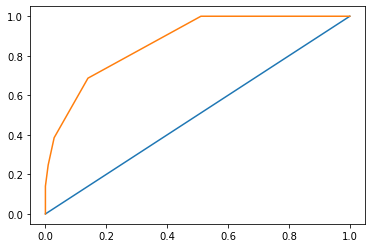



Test dataset :

Confusion matrix:
 [[763  33]
 [156  68]]
Accuracy : 0.8147058823529412
Precision : 0.6732673267326733
Recall : 0.30357142857142855
AUC score : 0.6667937903804738
F1 score : 0.4184615384615385


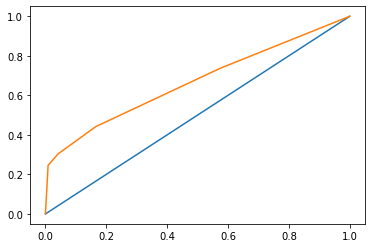

In [826]:
knn = KNeighborsClassifier()

model_eval(knn)

Train dataset :

Confusion matrix:
 [[1174  707]
 [  16 1865]]
Accuracy : 0.8078149920255183
Precision : 0.7251166407465007
Recall : 0.9914938862307283
AUC score : 0.9816367881506806
F1 score : 0.8376375477206377


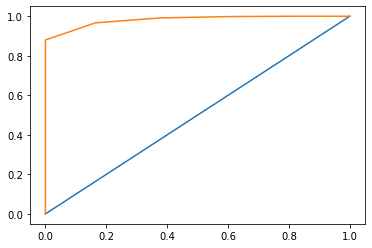



Test dataset :

Confusion matrix:
 [[407 389]
 [ 77 147]]
Accuracy : 0.5431372549019607
Precision : 0.27425373134328357
Recall : 0.65625
AUC score : 0.6356503499641063
F1 score : 0.3868421052631579


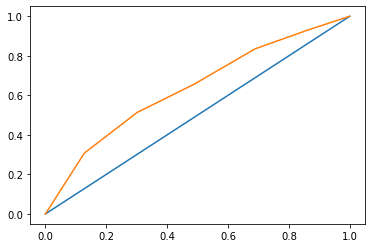

In [827]:
model_eval(knn, X_train_sm, X_test, y_train_sm, y_test)

## 5. Lightgbm

In [828]:
import lightgbm as lgb

lgbc = lgb.LGBMClassifier()

In [829]:
lgbc.fit(np.array(X_train), y_train)

LGBMClassifier()

Train dataset :

Confusion matrix:
 [[1877    4]
 [  92  406]]
Accuracy : 0.9596469104665826
Precision : 0.9902439024390244
Recall : 0.8152610441767069
AUC score : 0.9973578524624815
F1 score : 0.894273127753304


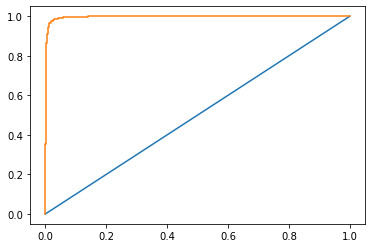



Test dataset :

Confusion matrix:
 [[774  22]
 [152  72]]
Accuracy : 0.8294117647058824
Precision : 0.7659574468085106
Recall : 0.32142857142857145
AUC score : 0.7160411432160804
F1 score : 0.4528301886792453


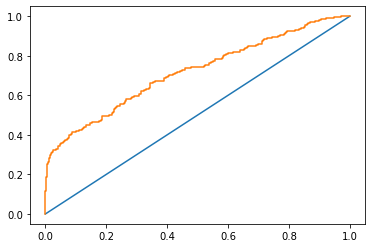

In [830]:
model_eval(lgbc, np.array(X_train), np.array(X_test), y_train, y_test)

Train dataset :

Confusion matrix:
 [[1863   18]
 [ 111 1770]]
Accuracy : 0.9657097288676236
Precision : 0.9899328859060402
Recall : 0.9409888357256778
AUC score : 0.9973296862409596
F1 score : 0.9648405560098119


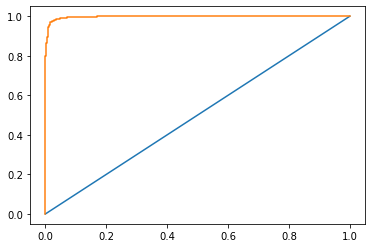



Test dataset :

Confusion matrix:
 [[754  42]
 [143  81]]
Accuracy : 0.8186274509803921
Precision : 0.6585365853658537
Recall : 0.36160714285714285
AUC score : 0.7193557071069634
F1 score : 0.4668587896253602


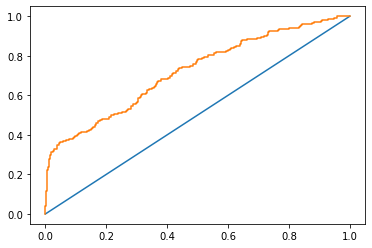

In [831]:
model_eval(lgbc, np.array(X_train_sm), np.array(X_test), y_train_sm, y_test)

## 6. GradientBoostingClassifier

In [832]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

Train dataset :

Confusion matrix:
 [[1868   13]
 [ 337  161]]
Accuracy : 0.8528793610760824
Precision : 0.9252873563218391
Recall : 0.3232931726907631
AUC score : 0.8794924514645504
F1 score : 0.4791666666666667


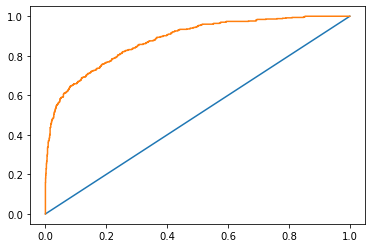



Test dataset :

Confusion matrix:
 [[782  14]
 [162  62]]
Accuracy : 0.8274509803921568
Precision : 0.8157894736842105
Recall : 0.2767857142857143
AUC score : 0.7169468996769561
F1 score : 0.41333333333333333


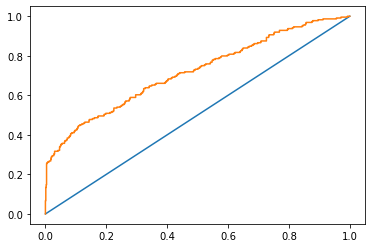

In [833]:
model_eval(gbc)

Train dataset :

Confusion matrix:
 [[1745  136]
 [ 280 1601]]
Accuracy : 0.8894205209994683
Precision : 0.9217040875071963
Recall : 0.8511430090377459
AUC score : 0.9489291188275493
F1 score : 0.8850193477059148


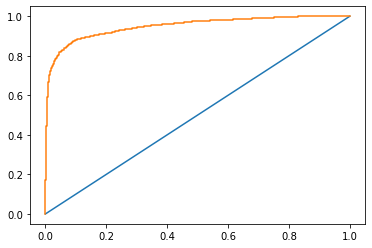



Test dataset :

Confusion matrix:
 [[721  75]
 [141  83]]
Accuracy : 0.788235294117647
Precision : 0.5253164556962026
Recall : 0.3705357142857143
AUC score : 0.707796796482412
F1 score : 0.43455497382198954


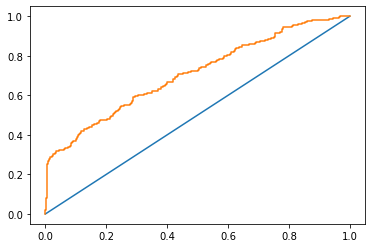

In [834]:
model_eval(gbc, X_train_sm, X_test, y_train_sm, y_test)

## 7. XGBoost

In [835]:
from xgboost import XGBClassifier

[23:20:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train dataset :

Confusion matrix:
 [[1881    0]
 [  44  454]]
Accuracy : 0.9815048339638504
Precision : 1.0
Recall : 0.9116465863453815
AUC score : 0.9998291945026251
F1 score : 0.9537815126050421


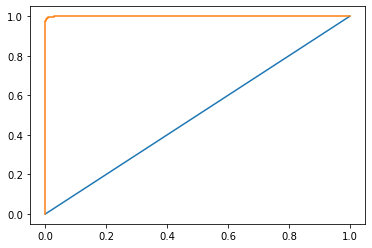



Test dataset :

Confusion matrix:
 [[754  42]
 [153  71]]
Accuracy : 0.8088235294117647
Precision : 0.6283185840707964
Recall : 0.3169642857142857
AUC score : 0.7191145459440057
F1 score : 0.42136498516320475


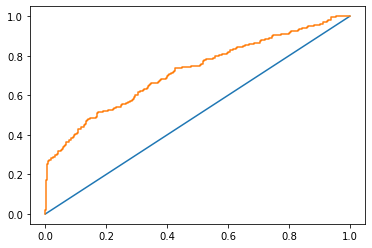

In [836]:
xgb = XGBClassifier()

model_eval(xgb)

[23:20:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train dataset :

Confusion matrix:
 [[1877    4]
 [  41 1840]]
Accuracy : 0.9880382775119617
Precision : 0.9978308026030369
Recall : 0.9782030834662414
AUC score : 0.9995949873394683
F1 score : 0.9879194630872484


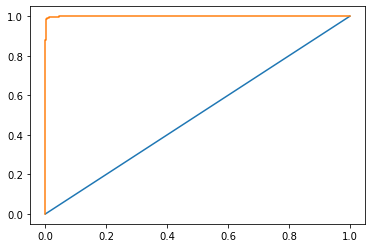



Test dataset :

Confusion matrix:
 [[743  53]
 [145  79]]
Accuracy : 0.8058823529411765
Precision : 0.5984848484848485
Recall : 0.35267857142857145
AUC score : 0.7274318018664752
F1 score : 0.4438202247191011


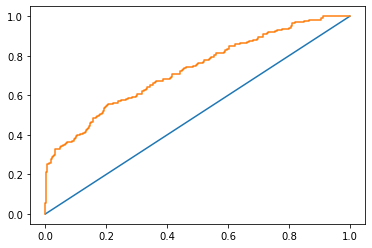

In [837]:
model_eval(xgb, X_train_sm, X_test, y_train_sm, y_test)

In [838]:
xGB_model = XGBClassifier(random_state = 4, max_depth = 8, 
                            n_estimators = 3000, reg_lambda = 1.2, reg_alpha = 1.2, 
                            min_child_weight = 1, 
                            objective = 'binary:logistic',
                            learning_rate = 0.15, gamma = 0.3, colsample_bytree = 0.5, eval_metric = 'auc')



Train dataset :

Confusion matrix:
 [[1879    2]
 [   3 1878]]
Accuracy : 0.9986709197235513
Precision : 0.9989361702127659
Recall : 0.9984051036682615
AUC score : 0.9999918036516711
F1 score : 0.9986705663387396


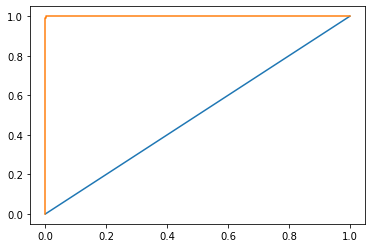



Test dataset :

Confusion matrix:
 [[750  46]
 [150  74]]
Accuracy : 0.807843137254902
Precision : 0.6166666666666667
Recall : 0.33035714285714285
AUC score : 0.7236405240488155
F1 score : 0.43023255813953487


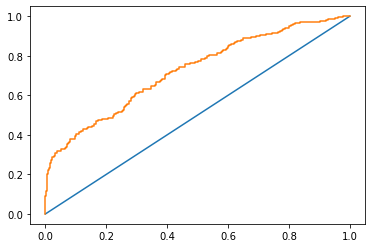

In [839]:
model_eval(xGB_model, X_train_sm, X_test, y_train_sm, y_test)

## ADA boost

In [840]:
from sklearn.ensemble import AdaBoostClassifier

Train dataset :

Confusion matrix:
 [[1857   24]
 [ 352  146]]
Accuracy : 0.8419503993274485
Precision : 0.8588235294117647
Recall : 0.2931726907630522
AUC score : 0.7914059213995803
F1 score : 0.437125748502994


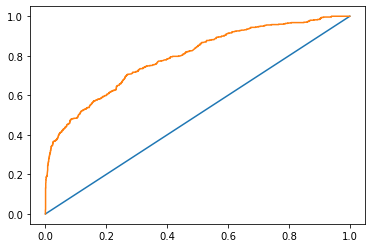



Test dataset :

Confusion matrix:
 [[781  15]
 [163  61]]
Accuracy : 0.8254901960784313
Precision : 0.8026315789473685
Recall : 0.27232142857142855
AUC score : 0.709560638011486
F1 score : 0.4066666666666666


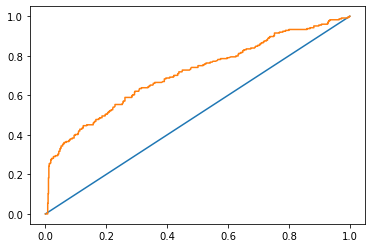

In [841]:
ada = AdaBoostClassifier()

model_eval(ada)

Train dataset :

Confusion matrix:
 [[1637  244]
 [ 305 1576]]
Accuracy : 0.854066985645933
Precision : 0.865934065934066
Recall : 0.837852206273259
AUC score : 0.9132238470776203
F1 score : 0.8516617130505268


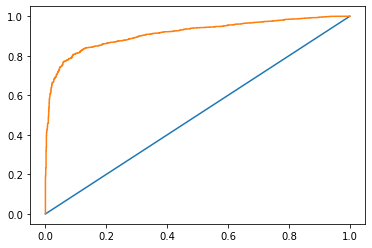



Test dataset :

Confusion matrix:
 [[681 115]
 [133  91]]
Accuracy : 0.7568627450980392
Precision : 0.441747572815534
Recall : 0.40625
AUC score : 0.6948357860732233
F1 score : 0.4232558139534884


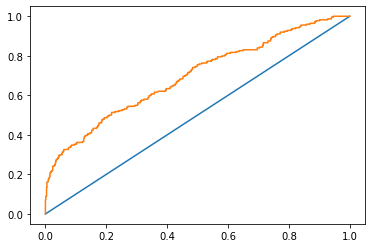

In [842]:
model_eval(ada, X_train_sm, X_test, y_train_sm, y_test)

## 8 Gaussian NB

In [843]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

Train dataset :

Confusion matrix:
 [[ 104 1777]
 [   7  491]]
Accuracy : 0.25010508617065996
Precision : 0.21649029982363316
Recall : 0.9859437751004017
AUC score : 0.5727775535955625
F1 score : 0.3550253073029646


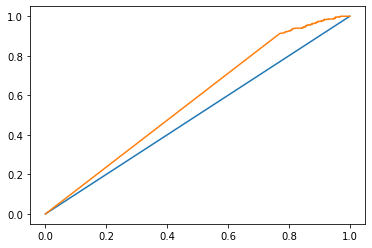



Test dataset :

Confusion matrix:
 [[ 49 747]
 [ 15 209]]
Accuracy : 0.2529411764705882
Precision : 0.2186192468619247
Recall : 0.9330357142857143
AUC score : 0.5396233399138549
F1 score : 0.3542372881355932


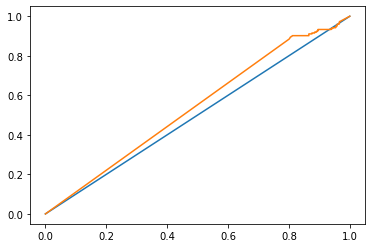

In [844]:
model_eval(nb)

Train dataset :

Confusion matrix:
 [[ 596 1285]
 [ 108 1773]]
Accuracy : 0.6297182349813929
Precision : 0.5797907128842381
Recall : 0.9425837320574163
AUC score : 0.7011306155938071
F1 score : 0.7179591010325979


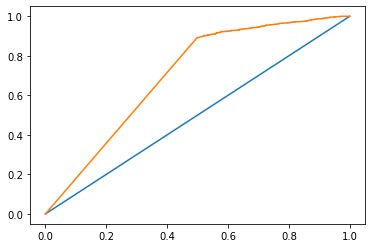



Test dataset :

Confusion matrix:
 [[259 537]
 [ 57 167]]
Accuracy : 0.4176470588235294
Precision : 0.2372159090909091
Recall : 0.7455357142857143
AUC score : 0.5660585292534098
F1 score : 0.3599137931034483


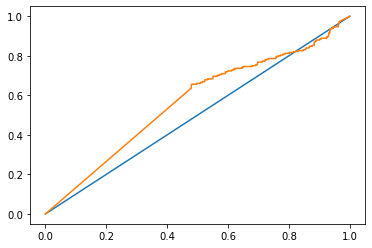

In [845]:
model_eval(nb, X_train_sm, X_test, y_train_sm, y_test)

In [846]:
pd.DataFrame(rfc.feature_importances_, index=X_train.columns)

,0
STDNT_AGE,0.018042
STDNT_TEST_ENTRANCE_COMB,0.042898
DISTANCE_FROM_HOME,0.072768
HIGH_SCHL_GPA,0.055232
FIRST_TERM_ATTEMPT_HRS,0.023021
...,...
MOTHER_HI_EDU_DESC_Middle School/Junior High,0.001849
MOTHER_HI_EDU_DESC_No Information,0.004834
MOTHER_HI_EDU_DESC_Other/Unknown,0.004977
DEGREE_GROUP_DESC_Bachelors,0.000225


# Logistic regression gave best results

Train dataset :

Confusion matrix:
 [[1851   30]
 [ 351  147]]
Accuracy : 0.8398486759142497
Precision : 0.8305084745762712
Recall : 0.29518072289156627
AUC score : 0.7563993347125877
F1 score : 0.43555555555555553


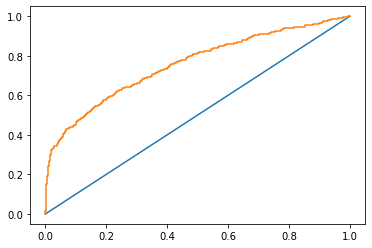



Test dataset :

Confusion matrix:
 [[788   8]
 [155  69]]
Accuracy : 0.8401960784313726
Precision : 0.8961038961038961
Recall : 0.3080357142857143
AUC score : 0.7104103104809764
F1 score : 0.45847176079734214


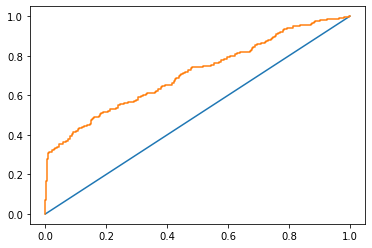

In [848]:
lor = LogisticRegression()
model_eval(lor)